# How many k-mers have H=0?

In [1]:
import sourmash
from sourmash.lca import lca_utils
from collections import defaultdict, Counter
import math
import pandas as pd

In [2]:
idx = sourmash.load_file_as_index('gtdb-rs207.genomic.k31.sqldb')

In [3]:
idx

In [4]:
print(len(idx))

317542


In [5]:
def calc_entropy(lineages, *, rank='species'):
    cnt = Counter()
    for lin in lineages:
        while lin[-1].rank != rank:
            lin = lin[:-1]
        cnt[lin] += 1
        
    total = sum(cnt.values())
    H = 0
    for v in cnt.values():
        p = v / total
        H -= p * math.log(p, 2)
        
    return H

In [12]:
assignments = {}

xx = []

for n, hashval in enumerate(idx.hashvals):
    if n % 100000 == 0:
        print('...', n)
        #if n: break
    idxlist = idx.hashval_to_idx[hashval]
    
    count = len(indexlist)
    H = math.log(count, 2)
    xx.append(dict(hashval=hashval, count=count, H=H))

... 0
... 100000
... 200000
... 300000
... 400000
... 500000
... 600000
... 700000
... 800000
... 900000
... 1000000
... 1100000
... 1200000
... 1300000
... 1400000
... 1500000
... 1600000
... 1700000
... 1800000
... 1900000
... 2000000
... 2100000
... 2200000
... 2300000
... 2400000
... 2500000
... 2600000
... 2700000
... 2800000
... 2900000
... 3000000
... 3100000
... 3200000
... 3300000
... 3400000
... 3500000
... 3600000
... 3700000
... 3800000
... 3900000
... 4000000
... 4100000
... 4200000
... 4300000
... 4400000
... 4500000
... 4600000
... 4700000
... 4800000
... 4900000
... 5000000
... 5100000
... 5200000
... 5300000
... 5400000
... 5500000
... 5600000
... 5700000
... 5800000
... 5900000
... 6000000
... 6100000
... 6200000
... 6300000
... 6400000
... 6500000
... 6600000
... 6700000
... 6800000
... 6900000
... 7000000
... 7100000
... 7200000
... 7300000
... 7400000
... 7500000
... 7600000
... 7700000
... 7800000
... 7900000
... 8000000
... 8100000
... 8200000
... 8300000
... 840

In [13]:
genome_df = pd.DataFrame(xx)


In [17]:
counts_dist = genome_df['count'].value_counts()[:5]
counts_dist

1    15378449
2     3407595
3     1337246
4      694687
5      419002
Name: count, dtype: int64

In [18]:
for i in counts_dist:
    print(i / len(genome_df) * 100)

67.47240262745959
14.950702885012534
5.867119663625364
3.0479147125995616
1.8383564978308815


In [20]:
len(genome_df[genome_df['count'] >= 5])

1974229

In [21]:
1974229 / len(genome_df) * 100


8.66186011130296

In [8]:
num_h0 = len(genome_df[genome_df.H == 0.0])
nonzero_df = genome_df[genome_df.H > 0.0]
total = len(genome_df)

print(f"{num_h0} of {total} hashvals ({num_h0 / total * 100:.1f}%) are perfectly informative at genome level!")

15378449 of 22792206 hashvals (67.5%) are perfectly informative at genome level!


In [9]:
len(nonzero_df)

7413757

## can we look at the actual H values to figure stuff out?

H <= 1 implies that there are two or fewer taxonomic results.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


(0.0, 5.0)

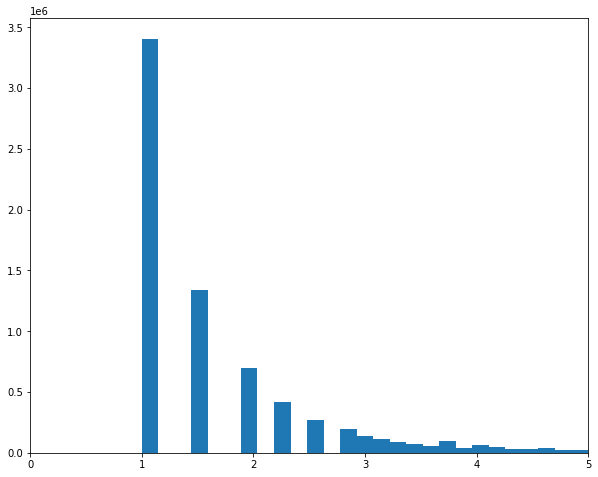

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(nonzero_df.H, bins=100)
ax.set_xlim(0, 5)

In [22]:
hashval = next(iter(nonzero_df.hashval))

genomes = idx.hashval_to_idx[hashval]
print(len(genomes))

print(math.log(len(genomes), 2))

1156
10.17492568250068


In [23]:
genome_df['H'].value_counts()[:5]


0.000000    15378449
1.000000     3407595
1.584963     1337246
2.000000      694687
2.321928      419002
2.584963      272151
2.807355      197502
3.000000      139748
3.169925      111348
3.321928       85806
3.459432       68983
3.584963       56921
3.700440       50006
3.807355       43380
3.906891       35408
4.000000       32935
4.087463       27969
4.169925       25532
4.247928       21222
4.321928       18620
4.392317       16282
4.459432       15221
4.523562       13723
4.584963       13425
4.643856       12274
4.700440       11826
4.754888       10144
4.807355        9114
4.857981        8784
4.954196        7865
4.906891        7765
5.000000        7410
Name: H, dtype: int64